In [1]:
import requests
import time

import numpy as np
import torch
import torchvision

import matplotlib.pyplot as plt
import torch.nn.functional as F

from io import BytesIO
from IPython.display import YouTubeVideo
from PIL import Image

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Lakota AI Code Camp Lesson 04: Introduction to PyTorch

PyTorch is a machine learning library of Python, designed for the research and development of machine learning, primarily neural networks.
Modern research into neural networks uses large arrays of numbers that are optimized using gradient-based methods (you are not expected to know this, we will go into more detail about all of this later!).
In addition, it allows the usage of graphics processing units (GPUs) to accelerate training.

PyTorch was based off of the Torch library, which provided similar functionality as PyTorch.
The major difference was that Torch was not interoperable with Python, whereas PyTorch is.
In 2017, Torch stopped active development and the functionality was moved towards the PyTorch library.

PyTorch was originally developed by Meta AI (then Facebook AI).
Eventually, it became part of the Linux Foundation.


## Review of Machine Learning

Recall that we had machine learning boiled down to a few key points:
*   data
*   model
*   training

We need data converted to some numeric format.
That numeric format is typically some array.

## Major Components of PyTorch



*   Creation of Tensors:

        torch.Tensor
*   Creation of neural network layers:

        torch.nn
*   Creation and access of datasets:

        torch.utils.data
*   Training of neural network:

        torch.optim

We'll go into detail in each of these in this lecture and more throughout the rest of the camp.
We'll do this by replicating the LeNet image recognition model and we'll train it on the image recognition dataset MNIST (Modified National Institute of Standards).

First, we'll:


*   define what tensors are;
*   go through some methods of creation;
*   some methods of manipulating tensors.



## PyTorch Tensors

### What are tensors?

### Tensor Creation

*   torch.tensor()
*   from_numpy
*   zeroes/zerolike
*   ones
*   arange
*   eye
*   empty/empty_like

The easiest method to call a tensor is:

In [2]:
a = torch.tensor([1, 2, 3])
print(a)

tensor([1, 2, 3])


We can make a tensor from a numpy ndarray.

In [3]:
torch.tensor(np.array([1, 2, 3]))

tensor([1, 2, 3])

We can create a tensor of all zeroes.

In [4]:
torch.zeros(size=(1, 3))

tensor([[0., 0., 0.]])

In [5]:
torch.zeros_like(a)

tensor([0, 0, 0])

We can create a tensor will all ones.

In [6]:
torch.ones(size=(1, 3))

tensor([[1., 1., 1.]])

In [7]:
torch.ones_like(a)

tensor([1, 1, 1])

We can make a tensor that's empty, that is it doesn't initialize the data. Whatever is there is put into the tensor.

In [8]:
torch.empty(size=(1, 3))

tensor([[0.0000e+00, 0.0000e+00, 8.9683e-44]])

In [9]:
torch.empty_like(a)

tensor([112076144, 112276592,        32])

We can make a range, like Python's range.

In [10]:
torch.arange(0, 10, step=2)

tensor([0, 2, 4, 6, 8])

We can make an array with ones on the diagonal and zeroes everywhere.

In [11]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [12]:
torch.eye(4)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [13]:
torch.eye(3, 4)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]])

### Tensor Manipulation

*   concat/cat/concatenate
*   hstack
*   vstack
*   permute
*   flaten
*   reshape
*   squeeze
*   unsqueeze

torch.concat/torch.cat/torch.concatenate all do the same thing. Concatenate several tensors together.

In [14]:
b = torch.cat((a, a, a))

In [15]:
b

tensor([1, 2, 3, 1, 2, 3, 1, 2, 3])

hstack is a horizontal stack.

In [16]:
torch.hstack((a, a, a))

tensor([1, 2, 3, 1, 2, 3, 1, 2, 3])

vstack is a vertical stack.

In [17]:
torch.vstack((a, a, a))

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

torch.permute changes the dimensions.

In [18]:
img_src = "https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/windows-kitchen.jpg"

resp = requests.get(img_src)

img = Image.open(BytesIO(resp.content))

img_array = np.asarray(img)

img_tensor = torch.tensor(img_array)

In [19]:
c = torch.permute(img_tensor, (2, 0, 1))

In [20]:
print(img_tensor.shape, c.shape)

torch.Size([473, 1260, 3]) torch.Size([3, 473, 1260])


Flatten turns a multi-dimensional tensor into a a 1-dimensional tensor.

In [21]:
d = torch.flatten(c)

In [22]:
d.shape

torch.Size([1787940])

Reshape, allows us to change a tensor into any shape as long as the product of the dimensions match.

In [23]:
e = d.reshape(img_tensor.shape)

In [24]:
e.shape

torch.Size([473, 1260, 3])

Squeeze gets rid of a dimension and unsqueeze adds a dimension.

In [25]:
f = e.unsqueeze(0)

In [26]:
f.shape

torch.Size([1, 473, 1260, 3])

In [27]:
g = f.squeeze(0)

In [28]:
g.shape

torch.Size([473, 1260, 3])

## torch.nn

This portion of the PyTorch library deals with the actual portions of the neural network layers.
In particular, almost everything will be a subclass of the
```
torch.nn.Module
```
class.
This includes our neural network layers, our activation functions, and even our models themselves.
The Module has several methods that we will be using throughout the course:
*   Parameters (not to be confused with the parameter of a function) are arrays of numbers. Typically they are used with matrix operations (we'll go into a lot of detail about matrix operations over the next several classes) or convolutional operations.
        self.parameters
*   The state_dict is short for the state dictionary. When we are training a neural network, we're interested in changing the parameters so they give us a better function, in some sense.
So, we want to keep parameters that are **good** and the state_dict class variable allows us to do that along with the load_state_dict parameters allow us to do that.
        self.state_dict
        self.load_state_dict
*   This methods takes a torch.device object as a parameter. A torch.device object tells us if we're using a computer (CPU), a graphics processing unit (GPU), or some other accelerator (Google's tensor processing unit (TPU), for example).
This method allows us to move all of our parameters to whichever device we want to train on.
        self.cuda
*   To train a neural network, we need to keep track of something called a gradient.
This requires a lot of overhead and extra memory, so PyTorch allows us to say whether or not we want to use keep track of these gradients by using the requires_grad method.
The train and eval methods tell us if we want to set up the Module for training or evaluation.
We do not need gradients for evaluation.
        self.requires_grad
        self.train
        self.eval

We'll describe the architecture of LeNet.
We'll use the following layers:

*   Convolutional layer

        torch.nn.Conv2d
*   Pooling layers

        torch.nn.AvgPool2d
*   Fully connected layers

        torch.nn.Linear
*   Activation functions

        torch.nn.Tanh
        torch.nn.ReLU

In [29]:
class LeNet(torch.nn.Module):

    def __init__(self):
        super().__init__()

        self.conv1 = torch.nn.Conv2d(in_channels=3,
                                     out_channels=6,
                                     kernel_size=5,
                                     padding=2)
        self.conv2 = torch.nn.Conv2d(in_channels=6,
                                     out_channels=16,
                                     kernel_size=5)
        self.pool = torch.nn.AvgPool2d(kernel_size=2,
                                       stride=2)
        self.fc1 = torch.nn.Linear(in_features=576,
                                   out_features=120)
        self.fc2 = torch.nn.Linear(in_features=120,
                                   out_features=84)
        self.fc3 = torch.nn.Linear(in_features=84,
                                   out_features=10)
        self.activation = torch.nn.Tanh()

    def forward(self, x):
        x = self.conv1(x)
        x = self.activation(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.activation(x)
        x = self.pool(x)
        x = torch.flatten(x, start_dim=1)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        x = self.fc3(x)
        x = self.activation(x)
        return x


In [30]:
model = LeNet()

## torch.utils.data

Now that we have a model, we need data to train the model on.
PyTorch has a dataset class and a dataloader class.

The dataset class

        torch.utils.data.Dataset
is essentially an iterable.
Each index of the dataset yields an input and a target.
The input could be an image, text, video, audio, etc.
The target is just some label that we want to give that image.
For image recognition, it's the name of an object.
For object detection, it's the name of the objects in the picture, paired with a bounding box or contour.

The dataset class is sufficient to train a neural network, but it's not as efficient.
That's where the dataloader class comes in.
The dataloader class takes a dataset as input and outputs a generator that gives us batched data.
If we tell it to give us batches of 4, then it will give us 4 images, for example, with their corresponding targets.
In particular, it allows us to use as much of the GPU memory as possible.

Let's get the CIFAR10 dataset.

These are the classes in the dataset.

In [31]:
class_list = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

While

        torchvision.datasets.CIFAR10
 isn't a

        torch.utils.data.Dataset
class, it is a subclass of it.
We'll download it into the

        ./data


In [33]:
normalize_ds = torchvision.datasets.CIFAR10(root='../data',
                                            train=True,
                                            download=True,
                                            transform=torchvision.transforms.ToTensor(),
                                            )
normalize_dl = torch.utils.data.DataLoader(normalize_ds,
                                           batch_size=len(normalize_ds),
                                           shuffle=True,
                                           num_workers=0)

100%|████████████████████████████████████████████████████████████████| 170498071/170498071 [01:49<00:00, 1563070.34it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data


We're going to normalize the data, which means that we subtract off the mean of the data and divide by the standard deviation of the data.

In [34]:
for data, _ in normalize_dl:
    mean = torch.mean(data, (0, 2, 3))
    std = torch.std(data, (0, 2, 3))

We want the data to be a torch.Tensor object and then normalized.

In [35]:
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize(mean=mean, std=std),
    ]
)

We get a train dataset and a test dataset.

In [36]:
train_ds = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform)
test_ds = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform)

We get the train DataLoader and the test DataLoader.

In [40]:
train_loader = torch.utils.data.DataLoader(train_ds,
                                          batch_size=len(train_ds) // 8,
                                          shuffle=True,
                                          num_workers=0,
                                          pin_memory=False)
test_loader = torch.utils.data.DataLoader(test_ds,
                                          batch_size=len(test_ds),
                                          shuffle=True,
                                          num_workers=0,
                                          pin_memory=False)

This is a helper function to let us look at what's in the dataset.

In [47]:
def imshow(img, label=None, class_list=class_list):
    # Pytorch has images in Channel x height x width, this converts to h x w x c
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.4914, 0.4822, 0.4465])
    std = np.array([0.2470, 0.2435, 0.2616])
    # undo the normalization
    img = std * img + mean
    # ensure that array is in the proper range to show the image.
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if label is not None:
        # label is assumed to be a (1, ) tensor
        label = label
        label = class_list[label]
        plt.title(label)
    plt.pause(0.001)

In [48]:
images, classes = next(iter(train_loader))

In [49]:
images.shape

torch.Size([6250, 3, 32, 32])

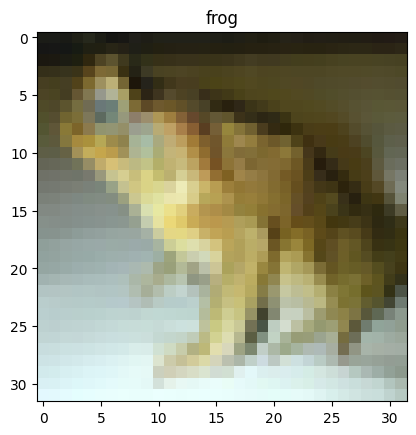

In [54]:
num = np.random.randint(low=0, high=len(train_ds))

image, label = train_ds[num]

imshow(image, label)

This is a helper function gives us the prediction.

In [55]:
def make_prediction(model, image, class_list=class_list):

    image = image.unsqueeze(0)
    pred = model(image)
    pred = torch.argmax(pred)
    return class_list[pred]

In [56]:
make_prediction(model, image)

'horse'

This is a helper function that let's us train a model.

In [57]:
def train(model, train_loader, criterion, opt, epochs=10):
    history = []
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    print("Epoch | Batch | Time(s) | Loss")
    print("------------------------------")

    step = 0

    for epoch in range(epochs):
        running_loss = 0.0
        t = time.time()

        for batch, (inputs, label) in enumerate(train_loader, 0):
            inputs, label = inputs.to(device), label.to(device)

            opt.zero_grad(set_to_none=True)

            outputs = model(inputs)
            loss = criterion(outputs, label)

            loss.backward()
            opt.step()

            running_loss += loss.item()
            step += 1
            history.append((step, loss))

            t = time.time() - t
            print(f"{epoch + 1:5d} | {batch+1:5d} | {t:.2f} | {running_loss:.5f}")
            running_loss = 0

    return history

This is a helper function that evaulates how well our model did.

In [58]:
def evaluate(model, testloader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, label in test_loader:
            inputs, label = inputs.to(device), label.to(device)
            outputs = model(inputs)

            _, predicted = torch.max(outputs.data, 1)
            total += label.size(0)
            correct += (predicted == label).sum().item()

    print(f'Accuracy of the network on 10000 test images: {100 * correct // total} %')
    return 100 * correct // total

We're putting it on the GPU if we can put it on the GPU, otherwise, we're putting it on the CPU.

In [59]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
model = model.to(device)

criterion = torch.nn.CrossEntropyLoss()
opt = torch.optim.SGD(model.parameters(), lr=1e-1, momentum=0.9)

cuda:0


We'll evaulate before training.

In [60]:
evaluate(model, test_loader)

Accuracy of the network on 10000 test images: 9 %


9

Now, we train the model.

In [63]:
history = train(model, train_loader, criterion, opt, epochs=23)

Epoch | Batch | Time(s) | Loss
------------------------------
    1 |     0 |        2 | 1.79909
    1 |     1 | 1687281937 | 1.78175
    1 |     2 |        3 | 1.78900
    1 |     3 | 1687281938 | 1.77636
    1 |     4 |        4 | 1.78148
    1 |     5 | 1687281939 | 1.78561
    1 |     6 |        5 | 1.77736
    1 |     7 | 1687281940 | 1.76821
    2 |     0 |        1 | 1.76764
    2 |     1 | 1687281945 | 1.76393
    2 |     2 |        2 | 1.75253
    2 |     3 | 1687281946 | 1.75856
    2 |     4 |        3 | 1.75953
    2 |     5 | 1687281947 | 1.76121
    2 |     6 |        4 | 1.75540
    2 |     7 | 1687281948 | 1.75954
    3 |     0 |        1 | 1.74557
    3 |     1 | 1687281953 | 1.74732
    3 |     2 |        2 | 1.72921
    3 |     3 | 1687281953 | 1.73742
    3 |     4 |        2 | 1.75440
    3 |     5 | 1687281954 | 1.74042
    3 |     6 |        3 | 1.72165
    3 |     7 | 1687281955 | 1.73329
    4 |     0 |        1 | 1.73354
    4 |     1 | 1687281960 | 1.73627
  

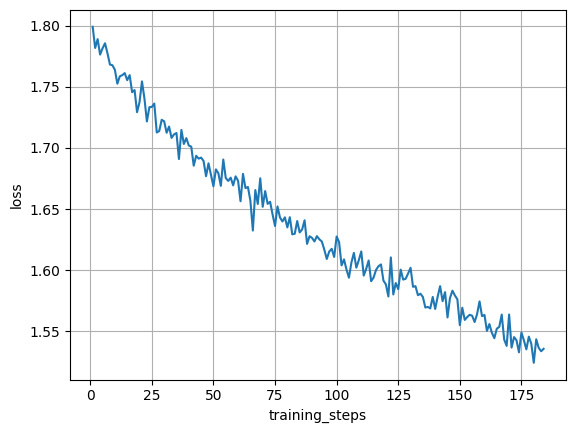

In [64]:
training_steps = np.array([step for step, _ in history])
loss = np.array([loss.item() for _, loss in history])

fig, ax = plt.subplots()
ax.plot(training_steps, loss)

ax.set(xlabel='training_steps', ylabel='loss')
ax.grid()
plt.show()

Let's evaulate again.

In [65]:
evaluate(model, test_loader)

Accuracy of the network on 10000 test images: 52 %


52

In [ ]:
num = np.random.randint(low=0, high=len(train_ds))

image, label = train_ds[num]

imshow(image, label)

In [ ]:
print(make_prediction(model, images[num].to(device)), class_list[classes[num]])

horse horse


Next, we're going to learn more about matrix algebra, starting with arrays and vectors.